In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, train_test_split, KFold, train_test_split

In [16]:
alphas = np.linspace(0.00000001, 0.001, 5000)  # (valor inicial, valor final, n.º de prontos)
x = np.load("X_train_regression1.npy")
y = np.load("y_train_regression1.npy")
# x = np.delete(x, 9, 0)
# y = np.delete(y, 9, 0)

In [17]:
alphas_ridge = np.arange(0.01, 5, 0.1)
param_grid = {'alpha': alphas_ridge}

grid_ridge = Ridge()
grid_search = GridSearchCV(grid_ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x, y)

print(grid_search.best_estimator_)
print(grid_search.best_params_)

Ridge(alpha=1.9100000000000001)
{'alpha': 1.9100000000000001}


SSE Mean: 91.46340067188478


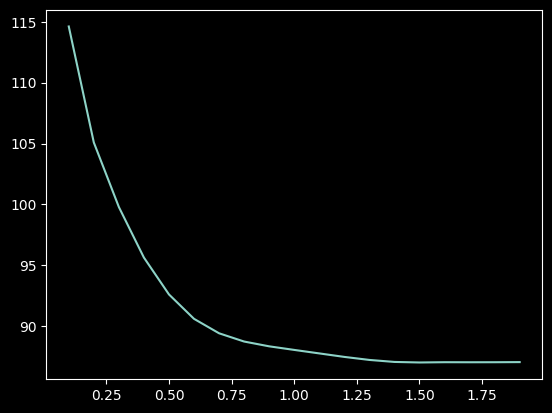

In [26]:
alphas_plot = np.arange(0.1, 2, 0.1)

# print(f'R_2 Normal: {ridge_model.score(x, y)}')

num_iterations = 10000
scores = [[] for _ in range(num_iterations)] 
list_sse = []
index_alpha = []

for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=4, train_size=10)
    for j in alphas_plot:
        ridge_model = Lasso(alpha=j)
        ridge_model.fit(X_train, y_train)
        sse = np.sum((np.linalg.norm(y_test - ridge_model.predict(X_test))) ** 2)
        # print(f'SSE for alpha {j}: {sse} (iteration {i})')
        scores[i].append(sse)

index_alpha = alphas_plot
for i, alpha in enumerate(alphas_plot):
    list_sse.append(np.mean([scores[j][i] for j in range(num_iterations)]))

print(f'SSE Mean: {np.mean(scores)}')
plt.plot(index_alpha,list_sse)

In [27]:
min_value = min(list_sse)
print(min_value)
print(index_alpha[list_sse.index(min_value)])
np.savetxt('x.txt', index_alpha, fmt='%f')
np.savetxt('y.txt', list_sse, fmt='%f')

87.03276770402661
1.5000000000000002
